# Задание 4. Невязка

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from collections import defaultdict

Парсим файлы

In [4]:
tstep = [0.01, 0.001]

results = defaultdict(list)
for file in range(5001):  
    filename = f'dump0.01/{file}.xyz'
    data = np.genfromtxt(filename, skip_header=2)
    results[0.01].append(data)

    filename = f'dump0.001/{file * 10}.xyz'
    data = np.genfromtxt(filename, skip_header=2)
    results[0.001].append(data)

    
results[0.01] = np.array(results[0.01])
results[0.001] = np.array(results[0.001])

(5001, 216, 6)

Считаем невязку скорости

In [5]:
discrepancy = np.mean((results[0.01] - results[0.001])**2, axis=1)

Генерим значения времени для графика

In [6]:
time = np.linspace(0.0, 50.0, 5001)

Строим график невязки

/tmp/ipykernel_3203186/3299680.py:1: RuntimeWarning: divide by zero encountered in log
  plt.plot(time[:5000], np.log(discrepancy[:5000, 3:].sum(axis=1) / (2*3**0.5)), label='Невязка скоростей')


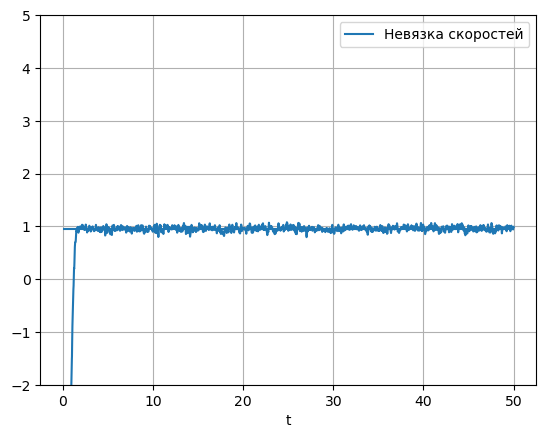

In [33]:
plt.plot(time[:5000], np.log(discrepancy[:5000, 3:].sum(axis=1) / (2*3**0.5)), label='Невязка скоростей')
plt.legend()
plt.ylim(-2, 5)
plt.hlines(9.47033588e-01, 0, 50)
plt.xlabel('t')
plt.grid()
plt.show()

Считаем диффузию

In [37]:
D = np.polyfit(time[500:5000], discrepancy[500:5000, 3:].sum(axis=1) / (2*3**0.5), deg=1)[1] / 12

Сравниваем с другими результатами

In [40]:
pd.DataFrame(index=["Грин-Кубо", "Эйнштейн", "Невязка","Rowley and Painter"],
             data = [0.129, 0.142, round(D, 3), 0.156])

,0
Грин-Кубо,0.129
Эйнштейн,0.142
Невязка,0.215
Rowley and Painter,0.156
